<a href="https://colab.research.google.com/github/ronak7613/Bank_Marketing_Prediction/blob/main/Bank_Marketing_Prediction_RonakVerma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ml_ronak/ronak_coe_assignment_data/week_9/train.csv')
train.head(8)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
5,15046,22,student,single,secondary,no,185,no,no,cellular,8,jul,1,-1,0,unknown,yes
6,15505,53,blue-collar,married,secondary,no,1777,yes,no,cellular,21,nov,5,154,1,failure,yes
7,22341,38,admin.,divorced,secondary,no,74,yes,no,cellular,23,jul,3,-1,0,unknown,no


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  object
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
 16  y          12870 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.7+ MB


Checking for the null values in the train dataset

In [ ]:
train.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we can see there are no null values

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/ml_ronak/ronak_coe_assignment_data/week_9/test.csv')
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,53608,32,management,single,tertiary,no,12569,no,no,cellular,1,jul,2,295,2,success
1,51055,25,services,single,secondary,no,801,no,no,cellular,5,jun,2,-1,0,unknown
2,52573,46,blue-collar,married,secondary,no,1728,yes,no,unknown,26,may,2,-1,0,unknown
3,50458,39,management,divorced,secondary,no,51,no,no,unknown,17,jun,2,-1,0,unknown
4,52272,31,services,single,tertiary,no,1626,no,no,unknown,31,jul,1,-1,0,unknown


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4291 non-null   int64 
 1   age        4291 non-null   int64 
 2   job        4291 non-null   object
 3   marital    4291 non-null   object
 4   education  4291 non-null   object
 5   default    4291 non-null   object
 6   balance    4291 non-null   int64 
 7   housing    4291 non-null   object
 8   loan       4291 non-null   object
 9   contact    4291 non-null   object
 10  day        4291 non-null   int64 
 11  month      4291 non-null   object
 12  campaign   4291 non-null   int64 
 13  pdays      4291 non-null   int64 
 14  previous   4291 non-null   int64 
 15  poutcome   4291 non-null   object
dtypes: int64(7), object(9)
memory usage: 536.5+ KB


Checking for the null values is test dataset

In [ ]:
test.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

As we can see there are no null values

Checking the unique values from all the columns

In [ ]:
print(train.apply(lambda col : col.unique()))

ID           [13829, 22677, 10541, 13689, 11304, 15046, 155...
age          [29, 26, 30, 41, 27, 22, 53, 38, 59, 37, 47, 4...
job          [technician, services, management, admin., stu...
marital                            [single, married, divorced]
education              [tertiary, secondary, unknown, primary]
default                                              [no, yes]
balance      [18254, 512, 135, 30, 321, 185, 1777, 74, 3342...
housing                                              [no, yes]
loan                                                 [no, yes]
contact                         [cellular, unknown, telephone]
day          [11, 5, 14, 10, 2, 8, 21, 23, 18, 29, 6, 3, 22...
month        [may, jun, aug, jul, sep, nov, mar, apr, jan, ...
campaign     [2, 3, 1, 5, 6, 4, 8, 19, 15, 10, 16, 24, 7, 2...
pdays        [-1, 154, 188, 655, 184, 128, 63, 13, 342, 124...
previous     [0, 1, 6, 5, 3, 8, 11, 9, 2, 4, 12, 10, 23, 7,...
poutcome                    [unknown, failure, other, s

<Axes: xlabel='month', ylabel='campaign'>

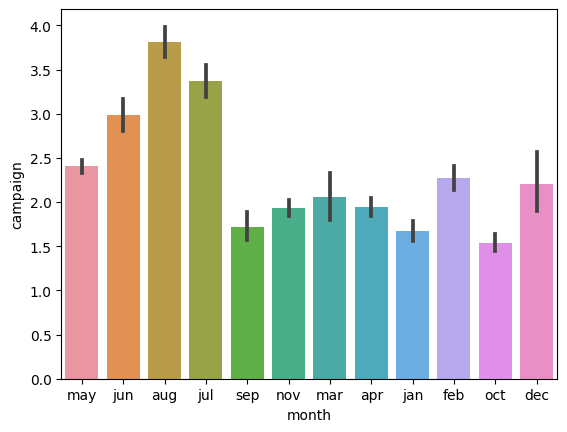

In [ ]:
sns.barplot(x='month',y='campaign',data=train)

As we can see in the month of August the campaigns were high in numbers whereas it was low in the month of October

<Axes: xlabel='marital', ylabel='count'>

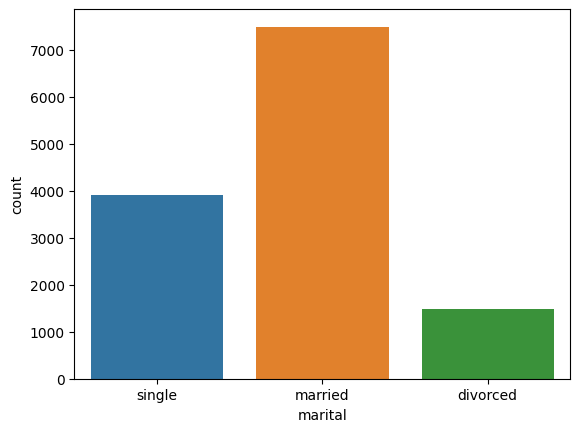

In [ ]:
sns.countplot(x='marital',data=train)

The number of married people is the highest in the dataset

<Axes: xlabel='education', ylabel='count'>

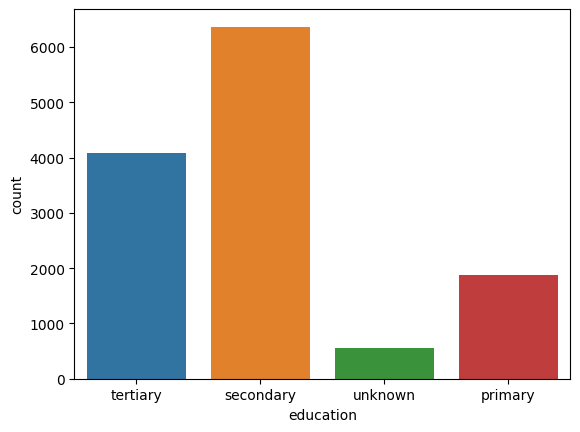

In [ ]:
sns.countplot(x='education',data=train)

By going through the above graph we can say that most of the people have completed their Secondary Education in the dataset

<Axes: xlabel='poutcome', ylabel='age'>

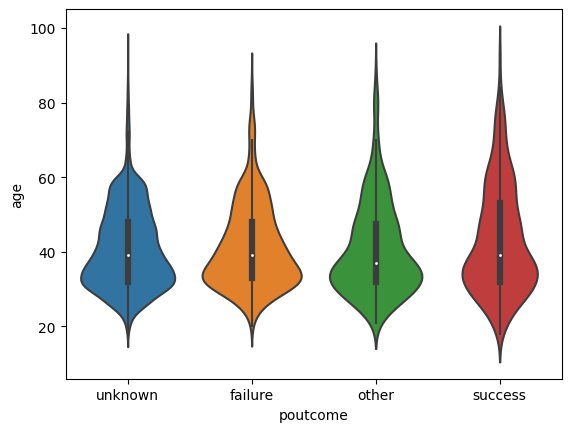

In [ ]:
sns.violinplot(x='poutcome',y='age',data=train)

As we can see people are being successful from the age of less than 20 till the age of 100 but this number is maximum between the age of 30 to 40

<Axes: xlabel='marital', ylabel='age'>

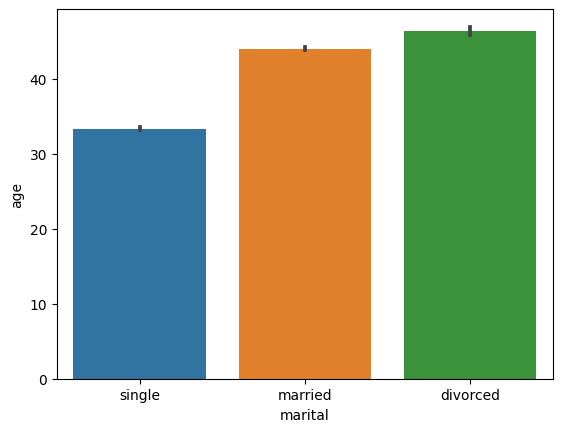

In [ ]:
sns.barplot(x='marital',y='age',data=train)

The maximum people are divorced who have maximum age of 50

<Axes: xlabel='education', ylabel='age'>

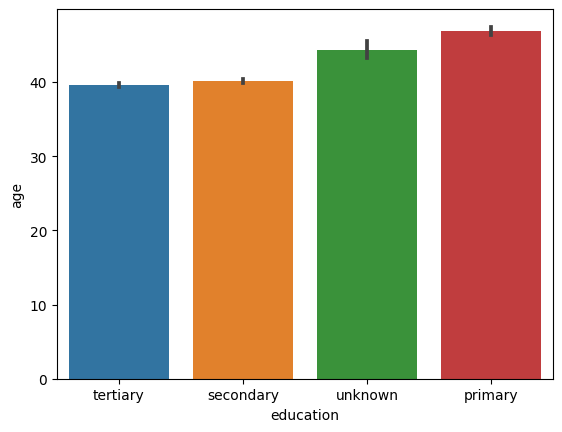

In [ ]:
sns.barplot(x='education',y='age',data=train)

People around the age of 50 have completed their primary education and they have the maximum number amongst the dataset

<Axes: >

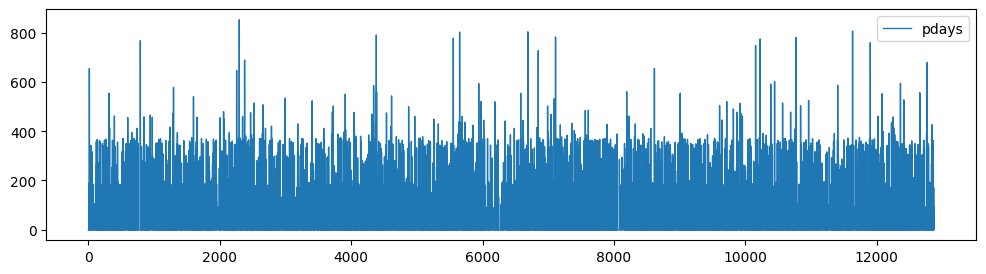

In [ ]:
train.plot.line(y='pdays',figsize=(12,3),lw=1)

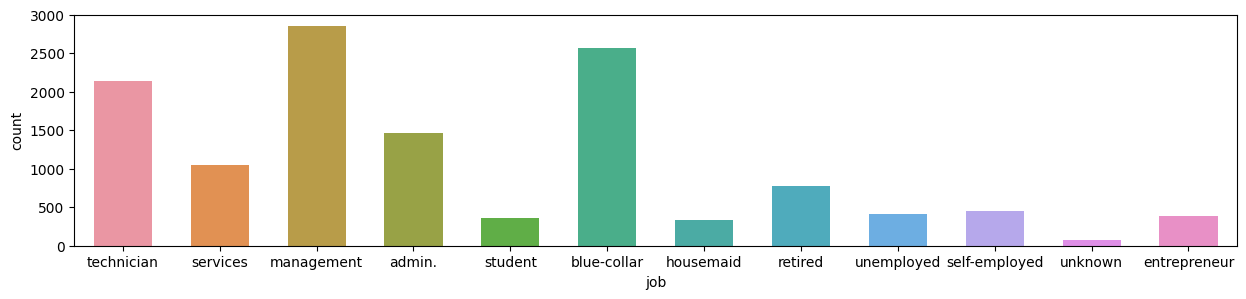

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
sns.countplot(x='job',data=train,width=.6)
plt.show()

The maximum people from the dataset have a Management job

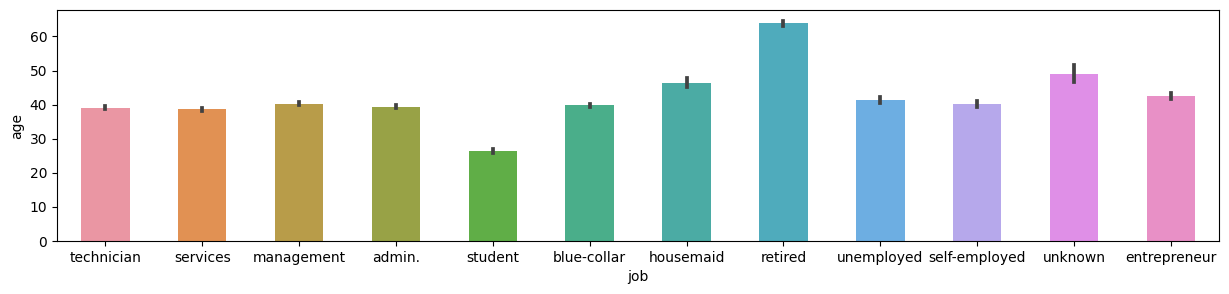

In [ ]:
fif, ax = plt.subplots(figsize=(15,3))
sns.barplot(x='job',y='age',data=train,width=.5)
plt.show()

As we can see the maximum number of people are Retired from the dataset

Here we are separating the features and labels from Train dataset

In [ ]:
X = train.iloc[:,:-1] #Features
y = train['y'] #Labels

**Label Encoding**

Here we have performed **Label Encoding** on both the Train and Test datasets

In [ ]:
X_enc = X.copy()
for col in X[['job','marital','education','default','housing','loan','contact','month','poutcome']]:
    lb = LabelEncoder()
    X_enc[col] = lb.fit_transform(X[col].values)
    print(f"Column: {col}")
    print("Categories:", lb.classes_)
    print("Encoded labels:", lb.transform(lb.classes_))
    print("-----------------------------------")




X_enc.loc[3]

Column: job
Categories: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Encoded labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]
-----------------------------------
Column: marital
Categories: ['divorced' 'married' 'single']
Encoded labels: [0 1 2]
-----------------------------------
Column: education
Categories: ['primary' 'secondary' 'tertiary' 'unknown']
Encoded labels: [0 1 2 3]
-----------------------------------
Column: default
Categories: ['no' 'yes']
Encoded labels: [0 1]
-----------------------------------
Column: housing
Categories: ['no' 'yes']
Encoded labels: [0 1]
-----------------------------------
Column: loan
Categories: ['no' 'yes']
Encoded labels: [0 1]
-----------------------------------
Column: contact
Categories: ['cellular' 'telephone' 'unknown']
Encoded labels: [0 1 2]
-----------------------------------
Column: month
Categories: ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 

ID           13689
age             41
job              9
marital          1
education        3
default          0
balance         30
housing          1
loan             0
contact          0
day             10
month            5
campaign         1
pdays           -1
previous         0
poutcome         3
Name: 3, dtype: int64

In [ ]:
test_enc = test.copy()
for cols in test[['job','marital','education','default','housing','loan','contact','month','poutcome']]:
    lb1 = LabelEncoder()
    test_enc[cols] = lb1.fit_transform(test[cols].values)
    print(f"Column: {col}")
    print("Categories:", lb1.classes_)
    print("Encoded labels:", lb1.transform(lb1.classes_))
    print("-----------------------------------")

test_enc.head()

Column: poutcome
Categories: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Encoded labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]
-----------------------------------
Column: poutcome
Categories: ['divorced' 'married' 'single']
Encoded labels: [0 1 2]
-----------------------------------
Column: poutcome
Categories: ['primary' 'secondary' 'tertiary' 'unknown']
Encoded labels: [0 1 2 3]
-----------------------------------
Column: poutcome
Categories: ['no' 'yes']
Encoded labels: [0 1]
-----------------------------------
Column: poutcome
Categories: ['no' 'yes']
Encoded labels: [0 1]
-----------------------------------
Column: poutcome
Categories: ['no' 'yes']
Encoded labels: [0 1]
-----------------------------------
Column: poutcome
Categories: ['cellular' 'telephone' 'unknown']
Encoded labels: [0 1 2]
-----------------------------------
Column: poutcome
Categories: ['apr' 'aug' 'dec' 'fe

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,53608,32,4,2,2,0,12569,0,0,0,1,5,2,295,2,2
1,51055,25,7,2,1,0,801,0,0,0,5,6,2,-1,0,3
2,52573,46,1,1,1,0,1728,1,0,2,26,8,2,-1,0,3
3,50458,39,4,0,1,0,51,0,0,2,17,6,2,-1,0,3
4,52272,31,7,2,2,0,1626,0,0,2,31,5,1,-1,0,3


Here we have build different classification models and trained those models on Train dataset.
After training the dataset we checked the scores of each model and then we predict the outcome on Test dataset.

# Clustering

I will do Agglomerative Clustering. The steps are:-

1. Finding right number of cluster through elbow method.

2. Fitting Agglomerative Clustering model.

3. Examining the clusters

In [ ]:
from matplotlib import colors
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
clus_enc_df = pd.concat([X_enc, test_enc], axis=0, ignore_index=True)

In [ ]:
clus_enc_df.shape

(17161, 16)

In [ ]:
plt.figure(figsize= (16, 8))
sns.heatmap(clus_enc_df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

In [ ]:
#one-hot encoding the data
clus_1 = pd.get_dummies(clus_enc_df)

we  will not perform scalling after scalling the result is not good.

In [ ]:
pca = PCA(n_components=3)
pca.fit(clus_1)
clus_pca = pd.DataFrame(pca.transform(clus_1), columns=(["col1","col2", "col3"]))
clus_pca1=clus_pca
clus_pca1.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,17161.0,-2.170789e-13,15807.761125,-15383.661085,-11073.276822,-6783.451636,24636.852023,28926.947275
col2,17161.0,-5.469370e-14,3263.978720,-8331.242631,-1383.036009,-965.607227,114.258635,100641.796590
col3,17161.0,2.914877e-16,104.346735,-83.596389,-47.137084,-46.064023,-45.661926,808.951965


In [ ]:
clus_pca2=clus_pca
clus_pca3=clus_pca
clus_pca4=clus_pca

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

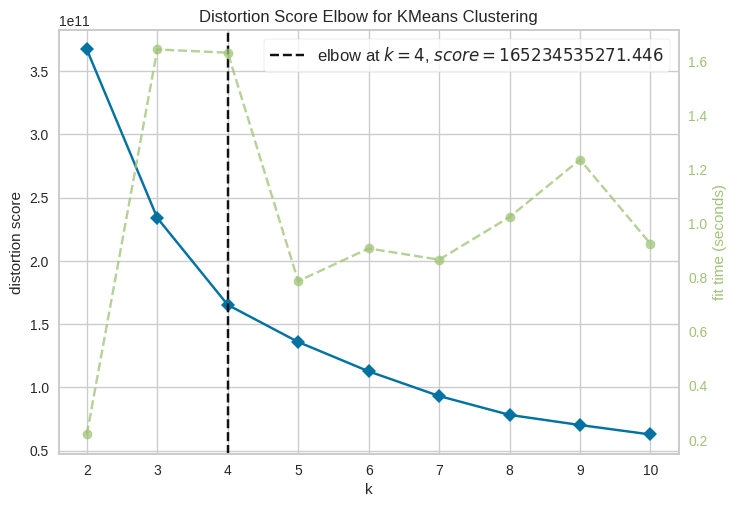

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(clus_pca1)
Elbow.show()

## for k =4

this is the final clustering model selected for the api

In [ ]:
AC_k4 = AgglomerativeClustering(n_clusters=4)
yhat_AC1 = AC_k4.fit_predict(clus_pca1)

clus_pca1["Clusters"] = yhat_AC1



In [ ]:
silhouette_avg1 = silhouette_score(clus_pca1, yhat_AC1)
print("Silhouette Score 1:", silhouette_avg1)

Silhouette Score 1: 0.5865696208281347


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assuming you have your data in X and you have already performed agglomerative clustering with n_clusters clusters
cluster_labels = AC_k4.labels_

# Calculate the Davies-Bouldin Index
db_index1 = davies_bouldin_score(clus_pca1, yhat_AC1)
print("Davies-Bouldin Index 1:", db_index1)


Davies-Bouldin Index 1: 0.6227401351766346


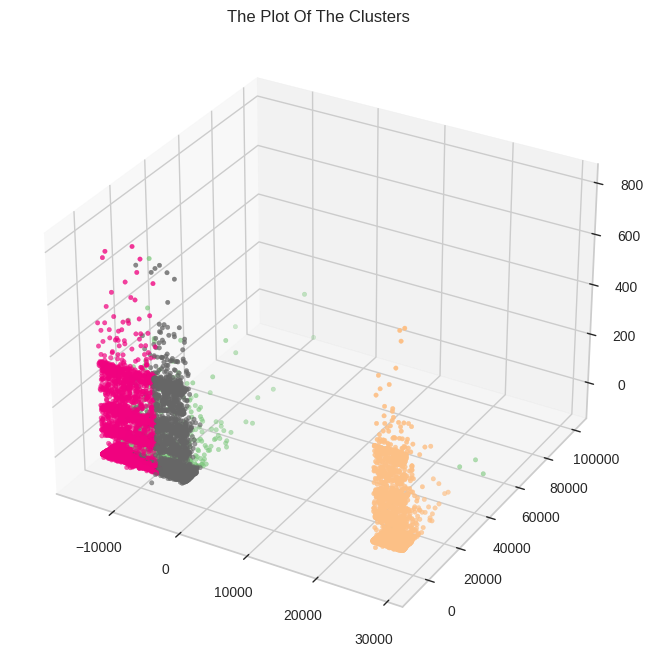

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(clus_pca1["col1"],clus_pca1["col2"],clus_pca1["col3"], s=40, c=clus_pca1["Clusters"], marker='.', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()



## performing the clustring for  k = 5

* using clus_pca1 for k=4 and clus_pca2 for k=5

In [ ]:
AC_k5 = AgglomerativeClustering(n_clusters=5)
yhat_AC2 = AC_k5.fit_predict(clus_pca2)

clus_pca2["Clusters"] = yhat_AC2



In [ ]:
silhouette_avg2 = silhouette_score(clus_pca2, yhat_AC2)
print("Silhouette Score 2:", silhouette_avg2)

Silhouette Score 2: 0.5885006311027318


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assuming you have your data in X and you have already performed agglomerative clustering with n_clusters clusters
cluster_labels = AC_k5.labels_

# Calculate the Davies-Bouldin Index
db_index2 = davies_bouldin_score(clus_pca2, yhat_AC2)
print("Davies-Bouldin Index 2:", db_index2)


Davies-Bouldin Index 2: 0.6289858606468106


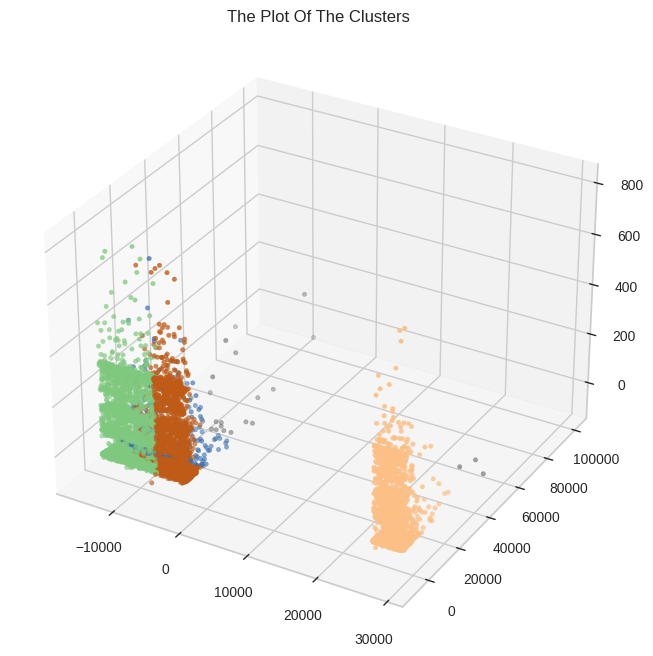

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(clus_pca2["col1"],clus_pca2["col2"],clus_pca2["col3"], s=40, c=clus_pca2["Clusters"], marker='.', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()



#for K=6

In [ ]:
AC_k6 = AgglomerativeClustering(n_clusters=6)
yhat_AC4 = AC_k6.fit_predict(clus_pca4)

clus_pca4["Clusters"] = yhat_AC4



In [ ]:
silhouette_avg4 = silhouette_score(clus_pca3, yhat_AC4)
print("Silhouette Score:", silhouette_avg4)

Silhouette Score: 0.532779688435794


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assuming you have your data in X and you have already performed agglomerative clustering with n_clusters clusters
cluster_labels = AC_k6.labels_

# Calculate the Davies-Bouldin Index
db_index4 = davies_bouldin_score(clus_pca4, yhat_AC4)
print("Davies-Bouldin Index 4 :", db_index4)


Davies-Bouldin Index 4 : 0.6754684079407962


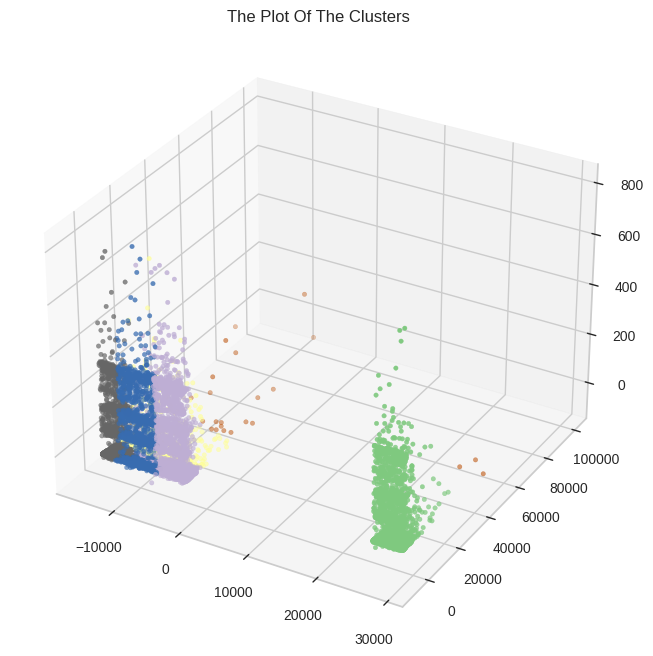

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(clus_pca4["col1"],clus_pca4["col2"],clus_pca4["col3"], s=40, c=clus_pca4["Clusters"], marker='.', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()



# for k = 3

In [ ]:
AC_k3= AgglomerativeClustering(n_clusters=3)
yhat_AC3 = AC_k3.fit_predict(clus_pca3)

clus_pca3["Clusters"] = yhat_AC3



In [ ]:
silhouette_avg3 = silhouette_score(clus_pca3, yhat_AC3)
print("Silhouette Score:", silhouette_avg3)

Silhouette Score: 0.5690636050121813


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assuming you have your data in X and you have already performed agglomerative clustering with n_clusters clusters
cluster_labels = AC_k3.labels_

# Calculate the Davies-Bouldin Index
db_index3 = davies_bouldin_score(clus_pca3, yhat_AC3)
print("Davies-Bouldin Index:", db_index3)


Davies-Bouldin Index: 0.683236957201338


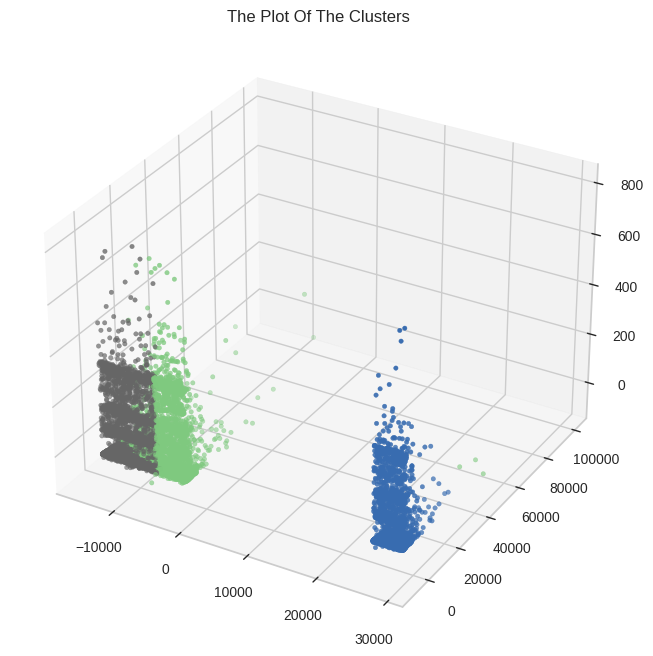

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(clus_pca3["col1"],clus_pca3["col2"],clus_pca3["col3"], s=40, c=clus_pca3["Clusters"], marker='.', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()



##evaluating the clustring models selecting the final model for api.

we will dump the model with number of clusters = 4. as it is having the best score among all.
the name of model is 'AC_K4'

##splitting the data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_enc,y,test_size=0.2)




##K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [ ]:
knn.score(X_train,y_train)

0.7146464646464646

In [ ]:
knn.score(X_test,y_test)

0.6744366744366744

In [ ]:
knn.predict(test_enc)

array(['yes', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

Support Vector Machine

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
svm.score(X_train,y_train)

0.6954156954156954

In [ ]:
svm.score(X_test,y_test)

0.677933177933178

In [ ]:
svm.predict(test_enc)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

Naive Bayes Classifier

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
nb.score(X_train,y_train)

0.7066822066822067

In [ ]:
nb.score(X_test,y_test)

0.6868686868686869

In [ ]:
nb.predict(test_enc)

array(['yes', 'no', 'no', ..., 'no', 'yes', 'no'], dtype='<U3')

**Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
dt.score(X_train,y_train)

0.7680652680652681

In [ ]:
dt.score(X_test,y_test)

0.7424242424242424

In [ ]:
dt.predict(test_enc)

array(['yes', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

**Ensembling**

In [ ]:
ens = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
ens.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
ens.score(X_train,y_train)

0.7424242424242424

In [ ]:
ens.score(X_test,y_test)

0.7198912198912198

In [ ]:
ens.predict(test_enc)

array(['yes', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

Creating a Dataframe of the scores of the classification models that we have built above.

In [ ]:
data = [['K-Nearest Neighbors',0.714063714063714,0.6911421911421911],['Support Vector Machine',0.6883255633255633,0.7062937062937062],['Naive Bayes Classifier',0.6991064491064491,0.7062937062937062],['Decision Tree',0.7607808857808858,0.7723387723387724],['Ensembling',0.7343628593628594,0.7416472416472416]]
scores = pd.DataFrame(data,columns = ['Classifiers','Train Data Scores','Test Data Scores'])

scores

,Classifiers,Train Data Scores,Test Data Scores
0,K-Nearest Neighbors,0.714064,0.691142
1,Support Vector Machine,0.688326,0.706294
2,Naive Bayes Classifier,0.699106,0.706294
3,Decision Tree,0.760781,0.772339
4,Ensembling,0.734363,0.741647


As we can see, amongst all the classification methods, **Decision Tree** method has given the best scores.

**Hyperparameter Tuning on Decision Tree**

1.RandomizedSearchCV

In [ ]:
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 11),
              "min_samples_split": range(2, 11),
              "criterion": ["gini", "entropy"]}

In [ ]:
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_enc,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [ ]:
random_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_split=9)

In [ ]:
random_search.best_params_

{'min_samples_split': 9,
 'max_features': 7,
 'max_depth': 3,
 'criterion': 'gini'}

In [ ]:
random_search.best_score_

0.7475524475524475

2.GridSearchCV

In [ ]:
param_grid = {"max_depth": [3, None],
              "max_features": range(1, 11),
              "min_samples_split": range(2, 11),
              "criterion": ["gini", "entropy"]}

In [ ]:
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(X_enc, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=10, min_samples_split=3)

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 10,
 'min_samples_split': 3}

In [ ]:
grid_search.best_score_

0.7502719502719503

**Hyperparameter Tuning on Ensembling**

1.RandomizedSearchCV

In [ ]:
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 11),
              "min_samples_split": range(2, 11),
              "criterion": ["gini", "entropy"]}

In [ ]:
random_search = RandomizedSearchCV(ens, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_enc,y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=2,
                                                    random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [ ]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=10,
                       min_samples_split=10, random_state=0)

In [ ]:
random_search.best_params_

{'min_samples_split': 10,
 'max_features': 10,
 'max_depth': None,
 'criterion': 'entropy'}

In [ ]:
random_search.best_score_

0.7815073815073814

2.GridSearchCV

In [ ]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3],
              "min_samples_split": [2, 3],
              "criterion": ["gini", "entropy"]}

In [ ]:
grid_search = GridSearchCV(ens, param_grid=param_grid, cv=5)
grid_search.fit(X_enc, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3],
                         'min_samples_split': [2, 3]})

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=3, min_samples_split=3,
                       random_state=0)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'min_samples_split': 3}

In [ ]:
grid_search.best_score_

0.7804195804195804

Feature Importance on **Decision Tree**

In [ ]:
dt.feature_importances_

array([0.00943582, 0.11775592, 0.        , 0.00647324, 0.        ,
       0.        , 0.01235062, 0.06784215, 0.00963196, 0.11615194,
       0.00360074, 0.08301987, 0.00495114, 0.31617568, 0.        ,
       0.25261093])

In [ ]:
feature_importance = pd.DataFrame({'importance' : dt.feature_importances_},index = X_enc.columns).sort_values('importance')

feature_importance

,importance
job,0.000000
education,0.000000
default,0.000000
previous,0.000000
day,0.003601
campaign,0.004951
marital,0.006473
ID,0.009436
loan,0.009632
balance,0.012351


<Axes: >

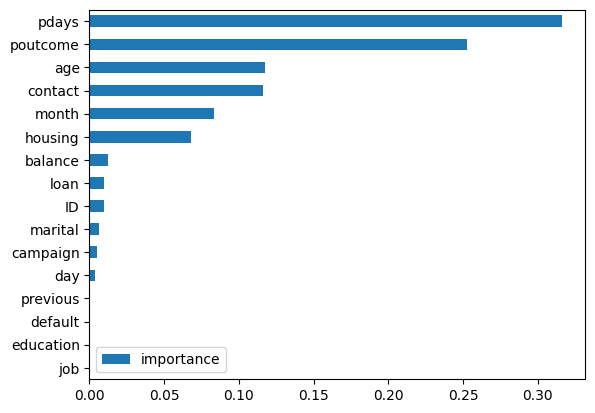

In [ ]:
feature_importance.plot.barh()

As we can see **pdays** is the most important feature in the dataset while **job** is the least important feature in the dataset

Feature importance on Ensembling

In [ ]:
ens.feature_importances_

array([5.81769645e-05, 8.76161893e-02, 6.53084433e-03, 1.02449525e-04,
       1.35370377e-03, 0.00000000e+00, 2.85660907e-02, 8.79176487e-02,
       1.92028474e-03, 1.24628446e-01, 1.43329356e-03, 1.03237202e-01,
       6.45495533e-03, 2.32489498e-01, 1.49942230e-01, 1.67748986e-01])

In [ ]:
FI = pd.DataFrame({'Importance': ens.feature_importances_},index = X_enc.columns).sort_values('Importance')

FI

,Importance
default,0.000000
ID,0.000058
marital,0.000102
education,0.001354
day,0.001433
loan,0.001920
campaign,0.006455
job,0.006531
balance,0.028566
age,0.087616


<Axes: >

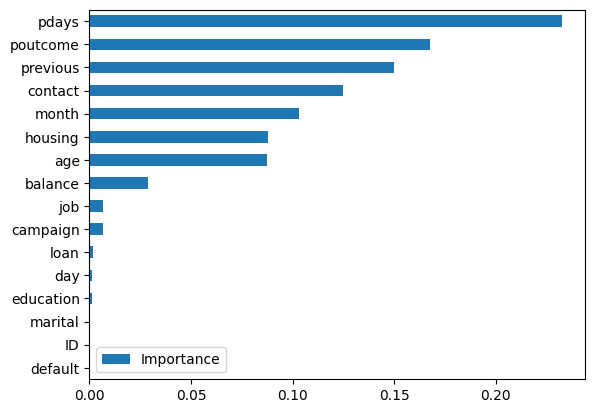

In [ ]:
FI.plot.barh()

Here in RandomForest Classifier, we can say that **pdays** is the most important feature whereas **default** is the least important feature

now saving the best model ww got after hyperparameter tunning.

#classification api

In [ ]:
import joblib

# Save the model with joblib
joblib.dump(random_search, 'random_search_model.sav')


['random_search_model.sav']

In [ ]:
loaded_model = joblib.load('/content/random_search_model.sav')
result = loaded_model.score(X_test, y_test)
print(result)

0.9475524475524476


#clustering api

In [ ]:
import joblib

# Save the model with joblib
joblib.dump(AC_k4, 'agglo_clust_model.sav')


['agglo_clust_model.sav']

In [ ]:
import sklearn

print("Scikit-Learn Version:", sklearn.__version__)


Scikit-Learn Version: 1.2.2
